Language modeling:
===
The aim of this notebook is to illustrate how to create and train a neural network to predict the next word in a sequence (i.e. sequence of words), based on the preceding words in the sequence.

Before jumping into it, let's take a minute to try to understand the task.

Language modeling is the task of assigning a probability to sentences in a language. Besides assigning a probability to each sequence of words, the language models also assigns a probability for the likelihood of a given word (or a sequence of words)

  --<strong data-cite="goldberg2017">(Neural Network Methods in Natural Language Processing, 2017)</strong>

In other words, A language model learns the probability of word occurence based on examples of text and we can use it to predict the word with highest probability occuring in a sequence.

The process of building our language model will be as follows:
  * Pre-process our data (Data Preprocessing)
    * Convert to lowercase
    * Remove all the special characters
    * Remove all the numbers from text
  * Tokenization
    * Sentence tokenization
    * Remove extra spaces (leading and trailing)
  * Model Training
    * Choose an sequence model
    * Architecture and layers explanation
  * Optimize Hyperparameters
    * Epochs, Batch Size, Layers
    * Sample sentence prediction

**Note: if you are running this notebook in Google Colaboratory, you have to download the dataset**

Data Download:
---

In [0]:
!wget --header="Host: doc-0c-a0-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_h2usbqe61t3p2javmc9f8vev3k7aj2re_nonce=rv89lnfuogggo; NID=202=LrP4uDlw-tpJIrOsSSVGjEUAYFBvMgE7pYsHllDi2RvAiohnhILxLsaostbt-xc33InPBNV05z_jAtAw4Km239HIJCcIFMoWS8Yh1FmMW-xpd8qowQuNbmhfho6LYG4h7_JheMnumByEDYwFL3O_tCzX30sFKeeVfNE_XxYUTwM" --header="Connection: keep-alive" "https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/035r11cge54f61vkg6q5351jddbf1r9g/92vd5ui5rkhiaht1ni81ku7c5im9pupf/1589041350000/09367493494736841528/09663297046543970124/1RviYV0UP6OhPzBeLePetR05D4us3W0eU?e=download&authuser=0&nonce=rv89lnfuogggo&user=09663297046543970124&hash=d597e24ctku7b8q1qlnh4betiqcfll96" -c -O 'corpus.txt'

In [1]:
# check if file is downloaded successfully
!ls

char_sequences.txt  corpus.txt	mapping.pkl  model.h5  sample_data


Read text file:
---

In [2]:
file_name = 'corpus.txt' # specify file name
file = open(file_name, 'r') # open file in read mode
corpus = file.read() # read file
file.close() # close the file
# check the file is read correctly
print(corpus[:600])

One winter's evening, towards the close of the year 1800, or within a year
or two of that time, a young medical practitioner, recently established in
business, was seated by a cheerful fire in his little parlour, listening to the
wind which was beating the rain in pattering drops against the window, or
rumbling dismally in the chimney. The night was wet and cold; he had
been walking through mud and water the whole day, and was now
comfortably reposing in his dressing-gown and slippers, more than half
asleep and less than half awake, revolving a thousand matters in his
wandering imagination. Fi


Data Preprocessing:
---
As we can see, our text consist of both capital and small words (e.g. "One", "one"), **numbers** (e.g. year like "1800"), **punctuation** (e.g. ",", ".", ";", "--"), **some long monologues that go on for hundreds of lines**, etc.

These observations, suggest that we need to pre-process the text data to let the model know similarity of word and makes it easier for our model to learn their representation.

Firstly, we will **lowercase** the entire text, this way we won't have to worry about **case sensitivity** of text. 

After that, we will **remove special character** (e.g. "--", ".") using regex since, they don't add any meaning to the text. A RegEx or **Regular Expression is a sequence of characters that define a search pattern**. We will be using RegEx module python built-in package re and filter only useful text.

Similarly, we will remove numeric characters from our text.

In [3]:
# lowercasing:
corpus = corpus.lower()
print(corpus[:150])

one winter's evening, towards the close of the year 1800, or within a year
or two of that time, a young medical practitioner, recently established in



In [4]:
# Python re module provides regular expression matching operation
import re

# filtering all the non-words characters
pattern = r'[^a-zA-z0-9\s]'
# re.sub function to replace the matches for a pattern with a replacement string
corpus = re.sub(pattern, '', corpus)

print(corpus[:600])

one winters evening towards the close of the year 1800 or within a year
or two of that time a young medical practitioner recently established in
business was seated by a cheerful fire in his little parlour listening to the
wind which was beating the rain in pattering drops against the window or
rumbling dismally in the chimney the night was wet and cold he had
been walking through mud and water the whole day and was now
comfortably reposing in his dressinggown and slippers more than half
asleep and less than half awake revolving a thousand matters in his
wandering imagination first he thought 


In [5]:
# similarly, filter non-numeric characters
pattern = r'[^a-zA-z\s]'
corpus = re.sub(pattern, '', corpus)

print(corpus[:150])

one winters evening towards the close of the year  or within a year
or two of that time a young medical practitioner recently established in
business 


Tokenization:
---
Once, we have pre-process our text, we can further focus on **splitting our text into tokens like list of sentences or list of words**. We can think of token as parts like a word is a token in a sentence, and sentence is a token in a paragraph. The former one known as sentence tokenization and later one word tokenization. Since, we have already remove punctuation during special character removal we can now split them using '\n'

In [6]:
corpus = corpus.split("\n")
print(corpus[:600])

['one winters evening towards the close of the year  or within a year', 'or two of that time a young medical practitioner recently established in', 'business was seated by a cheerful fire in his little parlour listening to the', 'wind which was beating the rain in pattering drops against the window or', 'rumbling dismally in the chimney the night was wet and cold he had', 'been walking through mud and water the whole day and was now', 'comfortably reposing in his dressinggown and slippers more than half', 'asleep and less than half awake revolving a thousand matters in his', 'wandering imagination first he thought how hard the wind was blowing', 'and how the cold sharp rain would be at that moment beating in his face', 'if he were not comfortably housed at home then his mind reverted to', 'his annual christmas visit to his native place and dearest friends he', 'thought how glad they would all be to see him and how happy it would', 'make rose if he could only tell her that he had found 

Data in the form of sentences separated by a "\n" is provided. The individual sentences are retrieved and stored as list item in the "corpus" list using the split method. Now, **we can strip leading and trailing spaces from the text**.

In [7]:
corpus = [x.lstrip() for x in corpus]
print(corpus)

['one winters evening towards the close of the year  or within a year', 'or two of that time a young medical practitioner recently established in', 'business was seated by a cheerful fire in his little parlour listening to the', 'wind which was beating the rain in pattering drops against the window or', 'rumbling dismally in the chimney the night was wet and cold he had', 'been walking through mud and water the whole day and was now', 'comfortably reposing in his dressinggown and slippers more than half', 'asleep and less than half awake revolving a thousand matters in his', 'wandering imagination first he thought how hard the wind was blowing', 'and how the cold sharp rain would be at that moment beating in his face', 'if he were not comfortably housed at home then his mind reverted to', 'his annual christmas visit to his native place and dearest friends he', 'thought how glad they would all be to see him and how happy it would', 'make rose if he could only tell her that he had found 

In [8]:
corpus = [x.rstrip() for x in corpus]
print(corpus)

['one winters evening towards the close of the year  or within a year', 'or two of that time a young medical practitioner recently established in', 'business was seated by a cheerful fire in his little parlour listening to the', 'wind which was beating the rain in pattering drops against the window or', 'rumbling dismally in the chimney the night was wet and cold he had', 'been walking through mud and water the whole day and was now', 'comfortably reposing in his dressinggown and slippers more than half', 'asleep and less than half awake revolving a thousand matters in his', 'wandering imagination first he thought how hard the wind was blowing', 'and how the cold sharp rain would be at that moment beating in his face', 'if he were not comfortably housed at home then his mind reverted to', 'his annual christmas visit to his native place and dearest friends he', 'thought how glad they would all be to see him and how happy it would', 'make rose if he could only tell her that he had found 

Now, we will be also using keras tokenizer function. It's function is different from sentence tokenization, as it will encode all the unique words present in the text and will provide us a dicitonary of the words being used in sentences.

We will create an instance of tokenizer.

The **fit_on_texts** method is used to encode the sentences.

The **word_index** method returns a dictionary of key value pairs where key is the word in the sentence and the value is the label assigned to it.

**Note that tokenizer lowercase the text by default, removes punctuation but we have also did that to make sure our network can understand the meaning of text.**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

# create an instance of tokenizer and assign hyperparamter num_words
tokenizer = Tokenizer()

# to encode the sentences
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)
print(tokenizer.word_index)

1346
{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'a': 5, 'in': 6, 'was': 7, 'he': 8, 'his': 9, 'it': 10, 'that': 11, 'i': 12, 'with': 13, 'as': 14, 'had': 15, 'which': 16, 'her': 17, 'you': 18, 'not': 19, 'surgeon': 20, 'be': 21, 'him': 22, 'at': 23, 'for': 24, 'by': 25, 'have': 26, 'on': 27, 'woman': 28, 'were': 29, 'or': 30, 'been': 31, 'said': 32, 'this': 33, 'if': 34, 'is': 35, 'man': 36, 'an': 37, 'then': 38, 'but': 39, 'door': 40, 'would': 41, 'she': 42, 'from': 43, 'young': 44, 'upon': 45, 'so': 46, 'there': 47, 'before': 48, 'now': 49, 'when': 50, 'no': 51, 'one': 52, 'through': 53, 'its': 54, 'might': 55, 'sir': 56, 'replied': 57, 'veil': 58, 'some': 59, 'my': 60, 'has': 61, 'than': 62, 'face': 63, 'all': 64, 'see': 65, 'few': 66, 'any': 67, 'such': 68, 'without': 69, 'many': 70, 'them': 71, 'time': 72, 'night': 73, 'first': 74, 'how': 75, 'could': 76, 'who': 77, 'what': 78, 'into': 79, 'black': 80, 'me': 81, 'their': 82, 'am': 83, 'even': 84, 'will': 85, 'house': 86, 'towards': 87

The tokenizer is initialized and data in the form of sentences separated by a "\n" is provided. The individual sentences are retrieved and stored as list item in the "corpus" list using the split method. The words in the list are tokenized and labeled using the fit_on_texts method. 

The next loop takes the **entire encoded sentence and breaks it down into an n_gram_sequence and appends each sequence into the input_sequences list**. Each row in the "Input Sequences" gives an n_gram_sequence

In [0]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

We then try to identify the length of the largest sentence by iterting through all the available Input Sequences

In [11]:
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len

25

Once the length of the largest sentence is identified, we pre pad the Input Sequences. So, that we would have entire training data to the left side of each Input Sequence and the label representing it to the right. 

As, we are predicting the word at the end of each sentence, we consider the last word of each Input Sequence as the target label that is to be predicted

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [13]:
input_sequences

array([[  0,   0,   0, ...,   0,  52, 440],
       [  0,   0,   0, ...,  52, 440, 441],
       [  0,   0,   0, ..., 440, 441,  87],
       ...,
       [  0,   0,   0, ..., 358,  13,   1],
       [  0,   0,   0, ...,  13,   1,  80],
       [  0,   0,   0, ...,   1,  80,  58]], dtype=int32)

Now we begin to segregate the Input Sequences by collecting all the encoded words following upto the last word as the input to the model and the last encoded word as the target label and store both of them in separate lists.

In [14]:
xs = input_sequences[:, :-1]
xs

array([[  0,   0,   0, ...,   0,   0,  52],
       [  0,   0,   0, ...,   0,  52, 440],
       [  0,   0,   0, ...,  52, 440, 441],
       ...,
       [  0,   0,   0, ...,  11, 358,  13],
       [  0,   0,   0, ..., 358,  13,   1],
       [  0,   0,   0, ...,  13,   1,  80]], dtype=int32)

In [15]:
labels = input_sequences[:,-1]
labels

array([440, 441,  87, ...,   1,  80,  58], dtype=int32)

Since, this is a multi-class classification model, we one-hot encode it using the to_categorical function

In [16]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Model training:
---
It's time to create and train neural network to predict what comes next in a sequence of words. But first, before designing a neural network, we need to realize the scenario in which we are going to use it.

The text is consider to be a sequence of words where each word is semantically connected with another to make a sentence. So, we will need some kind of memory to model our network so that it can learn the representation of sentence. As **the task is to predict the next word in a sequence, the network will be able to learn the representation of the sequence**

Sequential data like this is why we build recurrent neural networks. **Recurrent neural network is a type of neural network in which hidden layer is a combination of your input data at the current timestep and the hidden layer of the previous timestep**.

The network takes the first word and feeds it into a neural network layer which predicts an output. This process is repeated until the last time step which generates the last output. **The RNN scans through the data in a left to right sequence as well as it shares the parameters between input and output hidden layer**

Other than that, we will be using an Embedding Layer to learn the representation of words, **this is the type of layer that allows words with similar meaning to have a similar representation in space**.

There are different ways to learn a word embedding from text data. In this section, we will use Embedding layer, one of the advantages of embedding layer is that it learned jointly with a neural netwok model on a specific natural language processing task

We will also be using a Long Short-Term Memory (LSTM) hidden layer, it has an **additonal pipeline of context called cell state which passes through the network. This helps to keep the context from earlier tokens or steps relevant in later ones**.

The output layer is a Dense layer using the **softmax** activation function to output a probability prediction for total words using **categorical cross entropy loss using adam optimization algorithm**

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len - 1))
model.add((tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50
126/126 [==============================] - 2s 13ms/step - loss: 6.7228 - accuracy: 0.0715
Epoch 2/50
126/126 [==============================] - 2s 14ms/step - loss: 5.9775 - accuracy: 0.0777
Epoch 3/50
126/126 [==============================] - 2s 13ms/step - loss: 5.8821 - accuracy: 0.0777
Epoch 4/50
126/126 [==============================] - 2s 14ms/step - loss: 5.7921 - accuracy: 0.0777
Epoch 5/50
126/126 [==============================] - 2s 13ms/step - loss: 5.7313 - accuracy: 0.0777
Epoch 6/50
126/126 [==============================] - 2s 14ms/step - loss: 5.6870 - accuracy: 0.0777
Epoch 7/50
126/126 [==============================] - 2s 13ms/step - loss: 5.6562 - accuracy: 0.0777
Epoch 8/50
126/126 [==============================] - 2s 13ms/step - loss: 5.6302 - accuracy: 0.0777
Epoch 9/50
126/126 [==============================] - 2s 13ms/step - loss: 5.6103 - accuracy: 0.0777
Epoch 10/50
126/126 [==============================] - 2s 14ms/step - loss: 5.5912 - accura

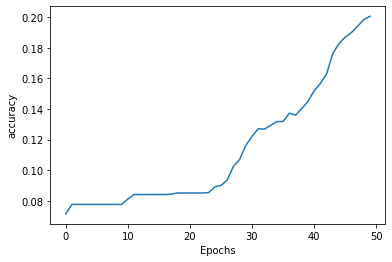

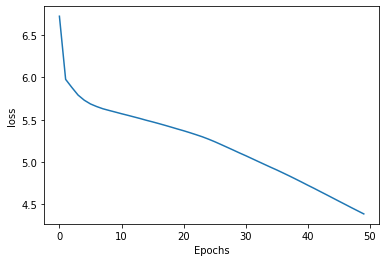

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

As we can see after training for 50 epochs, 1 layer LSTM network seems to have jaggedy surface, that means it is underfitting to the text. we can simply deal **with it by increasing the number of epochs or increasing the learning rate.**

We can now try to predict the next word in a sentence by giving it an initial set of words, convert it into sequences, pad the sentence to predict a large number of words following an input sentence.

In [19]:
seed_text = "towards the close"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
towards the close of the surgeon at the surgeon at the surgeon at


Also, certain words that have been predicted tend to get replaced at the end. This is because the **LSTM layer used in the model is uni-directional and the same word once predicted continues to pass forward influencing the words being predicted later in the sentence**. One way to deal with this problem is to use a bi-directional LSTM layer so that the words present even after the target word influences the prediction.

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len - 1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50
126/126 [==============================] - 2s 19ms/step - loss: 6.5677 - accuracy: 0.0712
Epoch 2/50
126/126 [==============================] - 2s 18ms/step - loss: 5.9494 - accuracy: 0.0777
Epoch 3/50
126/126 [==============================] - 2s 19ms/step - loss: 5.8374 - accuracy: 0.0777
Epoch 4/50
126/126 [==============================] - 2s 18ms/step - loss: 5.7548 - accuracy: 0.0777
Epoch 5/50
126/126 [==============================] - 2s 18ms/step - loss: 5.6905 - accuracy: 0.0777
Epoch 6/50
126/126 [==============================] - 2s 18ms/step - loss: 5.6372 - accuracy: 0.0812
Epoch 7/50
126/126 [==============================] - 2s 18ms/step - loss: 5.5959 - accuracy: 0.0841
Epoch 8/50
126/126 [==============================] - 2s 18ms/step - loss: 5.5607 - accuracy: 0.0841
Epoch 9/50
126/126 [==============================] - 2s 18ms/step - loss: 5.5273 - accuracy: 0.0846
Epoch 10/50
126/126 [==============================] - 2s 19ms/step - loss: 5.4996 - accura

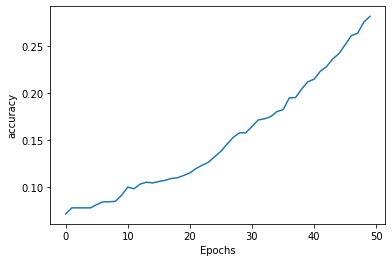

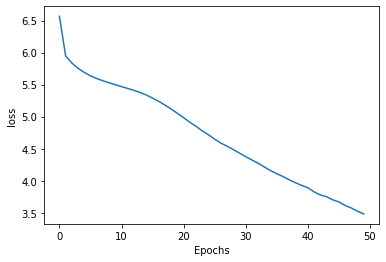

In [21]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The network is less underfitting, we can further improve our network by increasing the number of epochs

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len - 1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
126/126 [==============================] - 2s 18ms/step - loss: 6.5537 - accuracy: 0.0759
Epoch 2/100
126/126 [==============================] - 2s 18ms/step - loss: 5.9504 - accuracy: 0.0777
Epoch 3/100
126/126 [==============================] - 2s 18ms/step - loss: 5.8374 - accuracy: 0.0777
Epoch 4/100
126/126 [==============================] - 2s 17ms/step - loss: 5.7530 - accuracy: 0.0777
Epoch 5/100
126/126 [==============================] - 2s 18ms/step - loss: 5.6899 - accuracy: 0.0777
Epoch 6/100
126/126 [==============================] - 2s 19ms/step - loss: 5.6433 - accuracy: 0.0822
Epoch 7/100
126/126 [==============================] - 2s 19ms/step - loss: 5.6078 - accuracy: 0.0841
Epoch 8/100
126/126 [==============================] - 2s 17ms/step - loss: 5.5776 - accuracy: 0.0841
Epoch 9/100
126/126 [==============================] - 2s 18ms/step - loss: 5.5522 - accuracy: 0.0849
Epoch 10/100
126/126 [==============================] - 2s 18ms/step - loss: 5.527

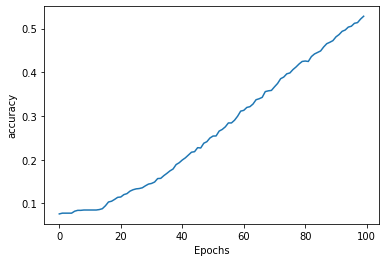

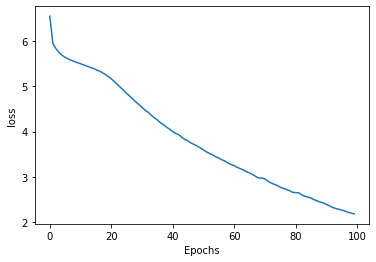

In [23]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
seed_text = "towards the close"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

towards the close of the surgeon well earned i know he is not


In [0]:
from pickle import dump
# it will be useful to save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))